In [72]:
from openfast_toolbox.openfast_toolbox.io import FASTOutputFile
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
df = pd.read_csv('./Output/linwei_wecsim.csv')
#df = pd.read_csv('./Output/linwei_wecsim.csv', usecols=['power', 'surge'])
print(df.columns)

Index(['time', 'surge', 'sway ', 'heave', 'roll', 'pitch', 'yaw', 'power'], dtype='object')


In [74]:
file = FASTOutputFile('IEA-15-240-RWT-UMaineSemi-1.out')
df = file.toDataFrame()
print(df.columns[600:])  # 查看所有的列標籤
fileList = ['chen','pinsin','HAO_openfast','HAO_FASTFarm']
Output_wecsimlist = ['surge', 'heave',  'pitch','ten1',"ten2", "ten3" ,'power']
OutputList= ['PtfmSurge_[m]', 'PtfmHeave_[m]', 'PtfmPitch_[deg]', 'FAIRTEN1_[N]','FAIRTEN2_[N]', 'FAIRTEN3_[N]','GenPwr_[kW]']

Index(['AB1N032AxInd_[-]', 'AB1N033AxInd_[-]', 'AB1N034AxInd_[-]',
       'AB1N035AxInd_[-]', 'AB1N036AxInd_[-]', 'AB1N037AxInd_[-]',
       'AB1N038AxInd_[-]', 'AB1N039AxInd_[-]', 'AB1N040AxInd_[-]',
       'AB1N041AxInd_[-]', 'AB1N042AxInd_[-]', 'AB1N043AxInd_[-]',
       'AB1N044AxInd_[-]', 'AB1N045AxInd_[-]', 'AB1N046AxInd_[-]',
       'AB1N047AxInd_[-]', 'AB1N048AxInd_[-]', 'AB1N049AxInd_[-]',
       'AB1N050AxInd_[-]', 'GenPwr_[kW]', 'GenTq_[kN-m]', 'FAIRTEN1_[N]',
       'FAIRTEN2_[N]', 'FAIRTEN3_[N]', 'ANCHTEN1_[N]', 'ANCHTEN2_[N]',
       'ANCHTEN3_[N]', 'CON1FX_[N]', 'CON3FX_[N]', 'CON5FX_[N]', 'CON1FY_[N]',
       'CON3FY_[N]', 'CON5FY_[N]', 'CON1FZ_[N]', 'CON3FZ_[N]', 'CON5FZ_[N]',
       'CON2FX_[N]', 'CON4FX_[N]', 'CON6FX_[N]', 'CON2FY_[N]', 'CON4FY_[N]',
       'CON6FY_[N]', 'CON2FZ_[N]', 'CON4FZ_[N]', 'CON6FZ_[N]', 'Invalid_[]',
       'Invalid_[]', 'Invalid_[]'],
      dtype='object')


In [75]:
def plotitem(i):
    for j in range(len(fileList)):
        file = FASTOutputFile('./Output/'+fileList[j]+'.out')
        df = file.toDataFrame()
        time  = df['Time_[s]']
        item = df[OutputList[i]]
        plt.plot(time, item, label=fileList[j])

    if i ==0 or i==1 or i==2 :
            df = pd.read_csv('./Output/linwei_wecsim.csv')
            time = df['time']
            item = df[Output_wecsimlist[i]]
            plt.plot(time, item, label='wecsim')
    elif i==6:
        df = pd.read_csv('./Output/linwei_wecsim.csv')
        time = df['time']
        item = df['power'] * 1000
        print(item)
        plt.plot(time, item, label='wecsim')
    plt.xlabel('Time [s]')
    plt.ylabel(OutputList[i])
    plt.xlim([0,300])
    plt.legend()
    plt.show()
    plt.close()

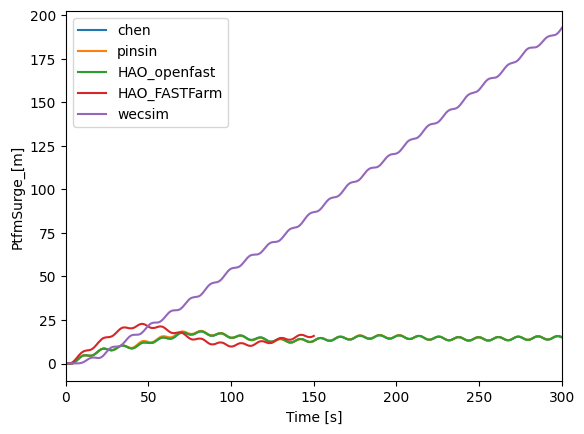

In [76]:
plotitem(0)

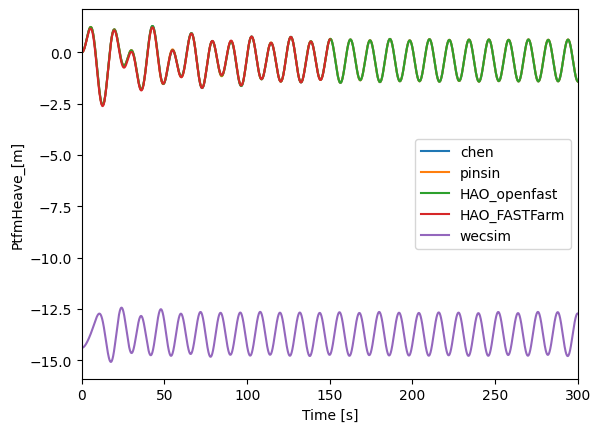

In [77]:
plotitem(1)

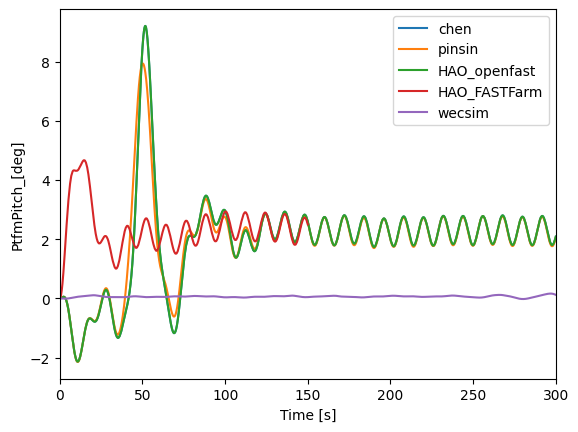

In [78]:
plotitem(2)

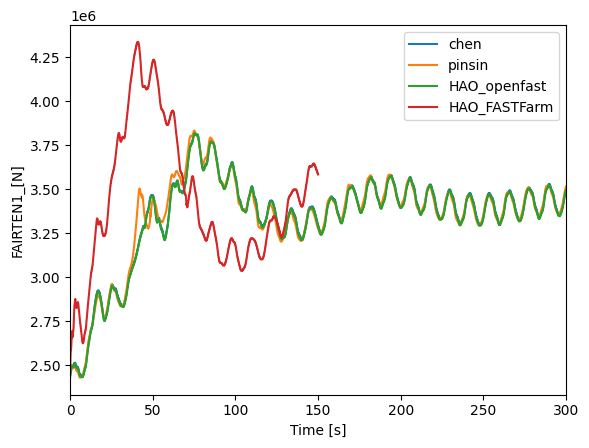

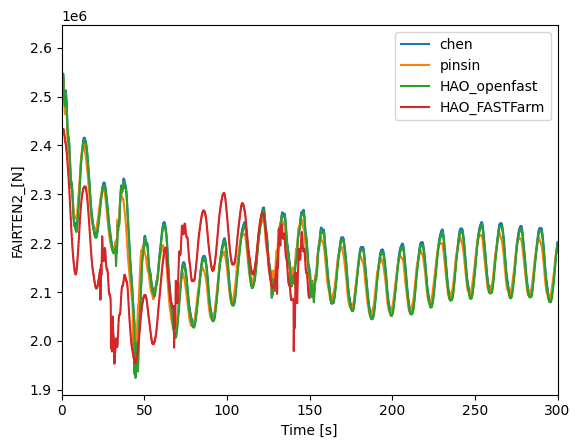

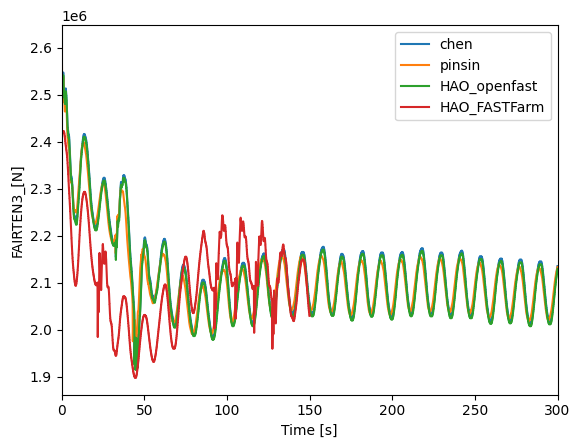

In [79]:
plotitem(3)
plotitem(4)
plotitem(5)

0            0.000000
1           12.936019
2           26.147115
3           39.616790
4           52.056993
             ...     
14996    12278.778510
14997    12297.991460
14998    12317.801730
14999    12338.016070
15000    12358.515220
Name: power, Length: 15001, dtype: float64


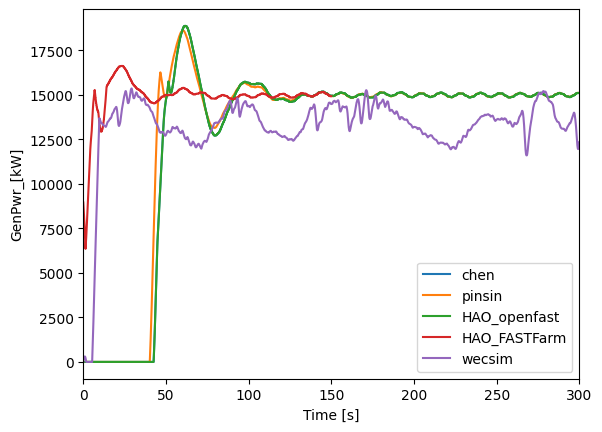

In [80]:
plotitem(6)